In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Activation,Dense,Dropout

In [23]:
data = pd.read_csv('wheat-production.csv')
data = data.rename(columns={'Wheat | 00000015 || Production | 005510 || tonnes':'Production' })
data.head(10)

,Entity,Code,Year,Production
0,Afghanistan,AFG,1961,2279000.0
1,Afghanistan,AFG,1962,2279000.0
2,Afghanistan,AFG,1963,1947000.0
3,Afghanistan,AFG,1964,2230000.0
4,Afghanistan,AFG,1965,2282000.0
5,Afghanistan,AFG,1966,2033000.0
6,Afghanistan,AFG,1967,2280000.0
7,Afghanistan,AFG,1968,2354000.0
8,Afghanistan,AFG,1969,2454000.0
9,Afghanistan,AFG,1970,2081000.0


In [66]:
data_poland = data.loc[data['Entity']=='Poland']
data_poland

,Entity,Code,Year,Production
6616,Poland,POL,1961,2792000.0
6617,Poland,POL,1962,2700000.0
6618,Poland,POL,1963,3067000.0
6619,Poland,POL,1964,3042000.0
6620,Poland,POL,1965,3338000.0
...,...,...,...,...
6672,Poland,POL,2017,11665702.0
6673,Poland,POL,2018,9637620.0
6674,Poland,POL,2019,10807490.0
6675,Poland,POL,2020,12515060.0


In [67]:
#data_poland = data_poland.iloc[data_poland['Production']/1000]
data_poland['Production'] = data_poland['Production']/1000
#data_poland['Production']=data_poland['Production'].div(1000) 
data_poland

C:\Users\pawel\AppData\Local\Temp\ipykernel_12988\2282317180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_poland['Production'] = data_poland['Production']/1000


,Entity,Code,Year,Production
6616,Poland,POL,1961,2792.000
6617,Poland,POL,1962,2700.000
6618,Poland,POL,1963,3067.000
6619,Poland,POL,1964,3042.000
6620,Poland,POL,1965,3338.000
...,...,...,...,...
6672,Poland,POL,2017,11665.702
6673,Poland,POL,2018,9637.620
6674,Poland,POL,2019,10807.490
6675,Poland,POL,2020,12515.060


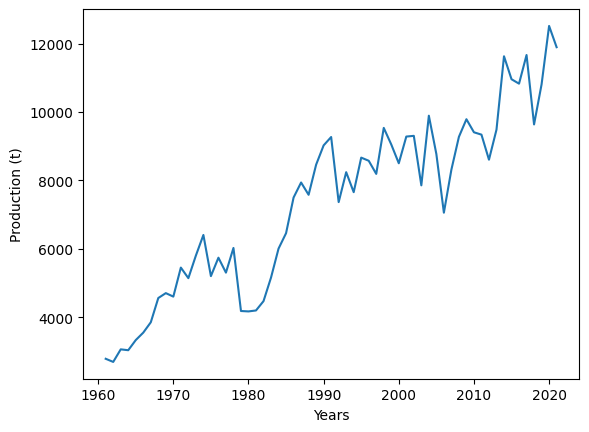

In [68]:
plt.figure()
plt.plot(data_poland['Year'],data_poland['Production'])
plt.xlabel("Years")
plt.ylabel("Production (t)")
plt.show()

In [91]:
scaler = MinMaxScaler()
value = []

for i in range(len(data_poland)):
    value.append(data_poland.iloc[i]['Production'])
array = np.array(value).reshape(-1,1)
array = scaler.fit_transform(array)
array

array([[0.00937335],
       [0.        ],
       [0.03739152],
       [0.03484441],
       [0.06500215],
       [0.0872231 ],
       [0.1179412 ],
       [0.19021789],
       [0.20475677],
       [0.19437477],
       [0.28076242],
       [0.24929038],
       [0.31650341],
       [0.37782754],
       [0.25537287],
       [0.31021461],
       [0.26574112],
       [0.33921321],
       [0.15154202],
       [0.15032878],
       [0.15315811],
       [0.18091708],
       [0.25115313],
       [0.33725734],
       [0.38316556],
       [0.48921779],
       [0.53403178],
       [0.49741326],
       [0.58701821],
       [0.64449489],
       [0.66937686],
       [0.47560555],
       [0.56471321],
       [0.50518866],
       [0.60804875],
       [0.59866715],
       [0.55961767],
       [0.6965394 ],
       [0.64710139],
       [0.59122053],
       [0.67070848],
       [0.67284357],
       [0.52553525],
       [0.73280061],
       [0.61858348],
       [0.4441818 ],
       [0.57231082],
       [0.669

In [97]:
train_data = []
train_labels = []
j = 0
for i in range(len(array)):
    try:
        train_data.append(array[(j+1)])
        train_labels.append(array[(j+1)])
        j+=1
    except:
        break
train_data = np.squeeze(train_data)
train_labels = np.array(train_labels)
train_data.shape

(60,)

In [98]:
train_data = train_data[:len(train_labels)]
train_data = np.expand_dims(train_data,1)
train_data.shape

(60, 1)

In [99]:
train_data[1]

array([0.03739152])

In [129]:
model = Sequential()
model.add(LSTM(300,input_shape=(1,1)))
model.add(Dropout(0.35))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.45))
model.add(Dense(1,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(1,activation='relu'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics="accuracy")
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 300)               362400    
                                                                 
 dropout_21 (Dropout)        (None, 300)               0         
                                                                 
 dense_21 (Dense)            (None, 300)               90300     
                                                                 
 dropout_22 (Dropout)        (None, 300)               0         
                                                                 
 dense_22 (Dense)            (None, 1)                 301       
                                                                 
 dropout_23 (Dropout)        (None, 1)                 0         
                                                                 
 dense_23 (Dense)            (None, 1)                

In [130]:
epochs = 100

History = model.fit(train_data,train_labels,epochs=epochs)

Epoch 1/100
2/2 [==============================] - 4s 15ms/step - loss: 0.2814 - accuracy: 0.0167
Epoch 2/100
2/2 [==============================] - 0s 18ms/step - loss: 0.2393 - accuracy: 0.0167
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 0.1949 - accuracy: 0.0167
Epoch 4/100
2/2 [==============================] - 0s 17ms/step - loss: 0.1675 - accuracy: 0.0167
Epoch 5/100
2/2 [==============================] - 0s 18ms/step - loss: 0.2297 - accuracy: 0.0167
Epoch 6/100
2/2 [==============================] - 0s 18ms/step - loss: 0.1563 - accuracy: 0.0333
Epoch 7/100
2/2 [==============================] - 0s 17ms/step - loss: 0.1258 - accuracy: 0.0333
Epoch 8/100
2/2 [==============================] - 0s 15ms/step - loss: 0.1615 - accuracy: 0.0333
Epoch 9/100
2/2 [==============================] - 0s 18ms/step - loss: 0.1914 - accuracy: 0.0167
Epoch 10/100
2/2 [==============================] - 0s 17ms/step - loss: 0.1559 - accuracy: 0.0167
Epoch 11/100
2/2 [=

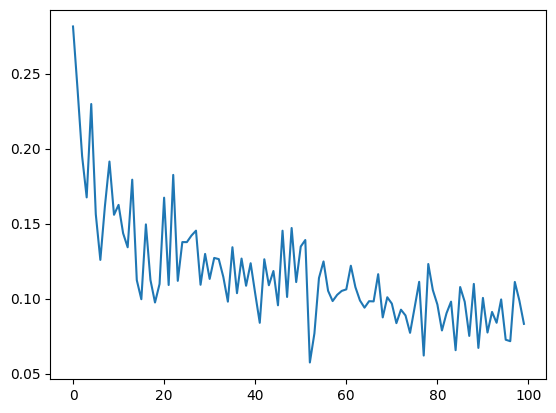

In [131]:
loss = History.history['loss']
plt.plot(loss)

In [175]:
preds = scaler.inverse_transform(model.predict(train_data))
preds 

2/2 [==============================] - 0s 6ms/step


array([[4346.7456],
       [4346.7456],
       [4346.7456],
       [4346.7456],
       [4346.7456],
       [4346.7456],
       [4409.6426],
       [4468.133 ],
       [4425.583 ],
       [4836.422 ],
       [4677.9287],
       [5019.7544],
       [5333.4614],
       [4707.952 ],
       [4987.514 ],
       [4759.8877],
       [5136.09  ],
       [4346.7456],
       [4346.7456],
       [4346.7456],
       [4376.9185],
       [4687.1187],
       [5126.0664],
       [5360.789 ],
       [5895.0767],
       [6113.6504],
       [5935.4526],
       [6368.518 ],
       [6643.749 ],
       [6762.4795],
       [5827.722 ],
       [6261.2515],
       [5973.472 ],
       [6469.6343],
       [6424.5713],
       [6236.759 ],
       [6892.204 ],
       [6656.1816],
       [6388.737 ],
       [6768.8364],
       [6779.03  ],
       [6072.462 ],
       [7065.5654],
       [6520.182 ],
       [5671.1406],
       [6297.7803],
       [6764.8843],
       [7015.424 ],
       [6829.6797],
       [6796.152 ],


2/2 [==============================] - 1s 6ms/step


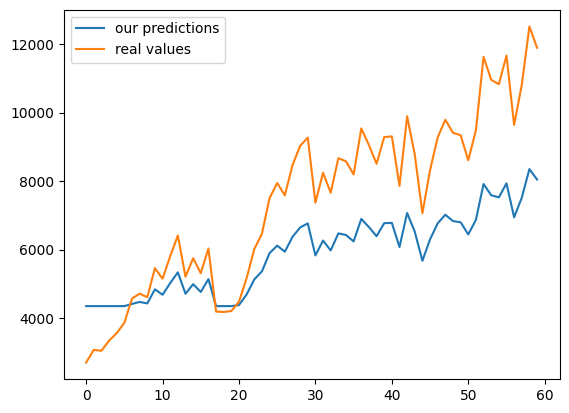

In [133]:
preds = scaler.inverse_transform(model.predict(train_data))
plt.plot(range(0,60),preds,label='our predictions')
plt.plot(range(0,60),scaler.inverse_transform(train_labels),label='real values')
plt.legend()

Next year Production prediction.

In [165]:
predict_data = array[-10:]
predict_data

array([[0.60189138],
       [0.69130326],
       [0.90969082],
       [0.84133841],
       [0.82810518],
       [0.9134638 ],
       [0.70683419],
       [0.82602552],
       [1.        ],
       [0.93667792]])

In [170]:
predict_years = model.predict(predict_data, verbose=1)
print(predict_years)

1/1 [==============================] - 0s 35ms/step
[[0.38105625]
 [0.4245708 ]
 [0.531243  ]
 [0.4977758 ]
 [0.49130479]
 [0.5330925 ]
 [0.432132  ]
 [0.4902881 ]
 [0.5755712 ]
 [0.5444764 ]]


In [174]:
next_year_prediction = scaler.inverse_transform(predict_years)
next_year_prediction

array([[6440.09  ],
       [6867.188 ],
       [7914.182 ],
       [7585.699 ],
       [7522.1855],
       [7932.335 ],
       [6941.402 ],
       [7512.207 ],
       [8349.266 ],
       [8044.0684]], dtype=float32)

In [ ]:
plt.plot(next_year_prediction)

In [156]:
wheat = []
for i in range (5):
    predict_data=train_data
    predict_years = model.predict(predict_data, verbose=1)
    wheat.append(predict_years)

wheat

2/2 [==============================] - 0s 5ms/step


[array([[0.16777742],
        [0.16777742],
        [0.16777742],
        [0.16777742],
        [0.16777742],
        [0.16777742],
        [0.17418568],
        [0.18014489],
        [0.17580973],
        [0.21766773],
        [0.20151977],
        [0.23634642],
        [0.26830825],
        [0.2045787 ],
        [0.2330617 ],
        [0.2098701 ],
        [0.24819916],
        [0.16777742],
        [0.16777742],
        [0.16777742],
        [0.1708516 ],
        [0.20245606],
        [0.24717796],
        [0.27109247],
        [0.32552797],
        [0.34779724],
        [0.32964167],
        [0.37376422],
        [0.40180588],
        [0.41390264],
        [0.31866562],
        [0.3628354 ],
        [0.33351523],
        [0.38406637],
        [0.37947512],
        [0.36034   ],
        [0.42711955],
        [0.40307263],
        [0.37582415],
        [0.4145503 ],
        [0.41558886],
        [0.34360075],
        [0.44478235],
        [0.38921636],
        [0.30271247],
        [0

In [135]:
for _ in range(10):
    years_10 = seed[-10:]
    years_10 = np.squeeze(years_10)
    years_10 = np.expand_dims(years_10,0)
    years_10 = np.expand_dims(years_10,0)
    pred = model.predict(years_10)
    seed = np.append(seed,pred)
seed

TypeError: in user code:

    File "c:\Users\pawel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\pawel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\pawel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\pawel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "c:\Users\pawel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\pawel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\layers\rnn\lstm.py", line 615, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'lstm_8' (type LSTM).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'lstm_8' (type LSTM):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=False
      • initial_state=None


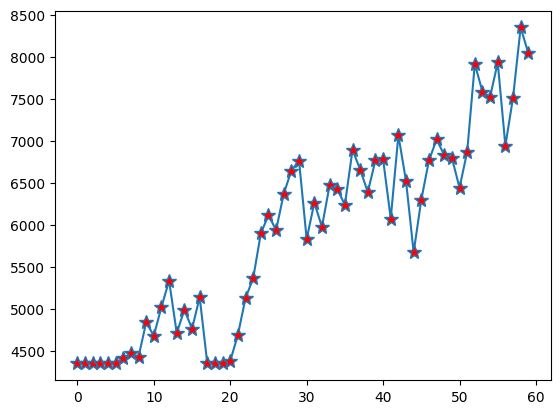

In [164]:
next_year_prediction = scaler.inverse_transform(predict_years.reshape(-1,1))
plt.plot(range(0,60),next_year_prediction,marker='*',markerfacecolor='red',markersize=10)